In [1]:
from main import file_locate
from ml_models import logistic_regression
from ml_models import naive_bayes
from ml_models import k_nearest_neighbors
from ml_models import support_vector
from ml_models import gradient_boost
from ml_models import random_forest
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
def analysis(labels_test, labels_pred):
    cm = confusion_matrix(labels_test, labels_pred)
    print(cm)
    accuracy = accuracy_score(labels_test, labels_pred)
    print("Accuracy: ", accuracy)
    f1 = f1_score(labels_test, labels_pred)
    print("F1: ", f1)
    report = classification_report(labels_test, labels_pred)
    print("Classification Report:")
    print(report)

In [3]:
def auc(labels_test, labels_pred):
    fpr, tpr, thresholds = roc_curve(labels_test, labels_pred)
    auc = roc_auc_score(labels_test, labels_pred)

    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

In [4]:
def precision_recall(labels_test, labels_pred):
    precision, recall, _ = precision_recall_curve(labels_test, labels_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.show()

In [5]:
file_locate('ml-analysis.ipynb')
filename = 'cleaned-framingham.csv'

Logistic Regression
[[1731  749]
 [ 963 1517]]
Accuracy:  0.6548387096774193
F1:  0.639275179098188
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      2480
           1       0.67      0.61      0.64      2480

    accuracy                           0.65      4960
   macro avg       0.66      0.65      0.65      4960
weighted avg       0.66      0.65      0.65      4960

[[445 176]
 [ 53  58]]
Accuracy:  0.6871584699453552
F1:  0.33623188405797105
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       621
           1       0.25      0.52      0.34       111

    accuracy                           0.69       732
   macro avg       0.57      0.62      0.57       732
weighted avg       0.80      0.69      0.73       732



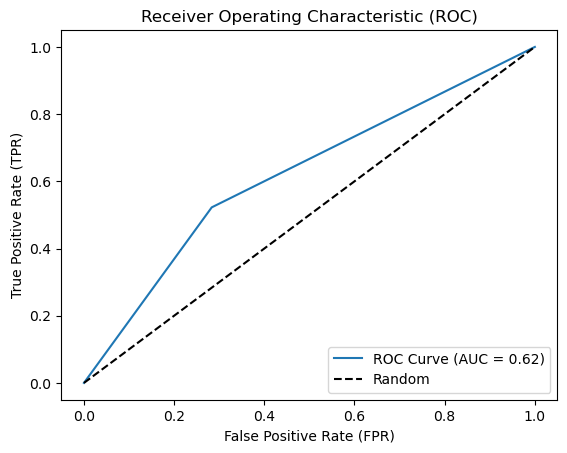

In [6]:
labels_train, labels_train_pred, labels_test, labels_pred = logistic_regression.logistic_regression(filename)
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)

Naive Bayes:
Best alpha 0.001
Best f1: 0.11199999999999999
Best threshold 0.1
Test f1 0.3082437275985663
[[1767  713]
 [1112 1368]]
Accuracy:  0.6320564516129032
F1:  0.5998684499013374
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.71      0.66      2480
           1       0.66      0.55      0.60      2480

    accuracy                           0.63      4960
   macro avg       0.64      0.63      0.63      4960
weighted avg       0.64      0.63      0.63      4960

[[439 182]
 [ 55  56]]
Accuracy:  0.6762295081967213
F1:  0.32091690544412604
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       621
           1       0.24      0.50      0.32       111

    accuracy                           0.68       732
   macro avg       0.56      0.61      0.55       732
weighted avg       0.79      0.68      0.72       732



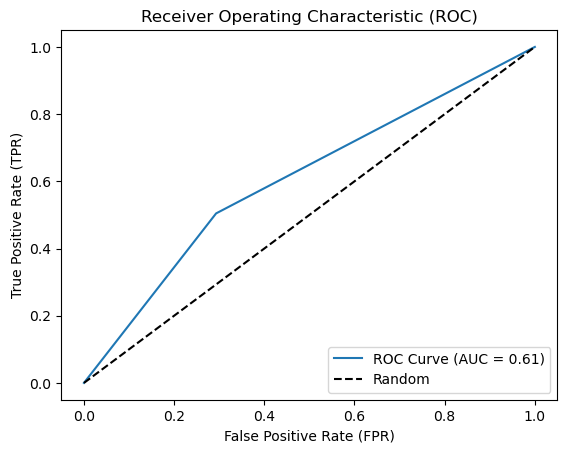

In [7]:
labels_train, labels_train_pred, labels_test, labels_pred = naive_bayes.naive_bayes(filename)
naive_bayes.find_alpha(filename)
naive_bayes.find_threshold(filename)
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)

K-Nearest Neighbors:
[[2193  287]
 [   6 2474]]
Accuracy:  0.9409274193548387
F1:  0.944094638427781
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      2480
           1       0.90      1.00      0.94      2480

    accuracy                           0.94      4960
   macro avg       0.95      0.94      0.94      4960
weighted avg       0.95      0.94      0.94      4960

[[507 114]
 [ 71  40]]
Accuracy:  0.7472677595628415
F1:  0.3018867924528301
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       621
           1       0.26      0.36      0.30       111

    accuracy                           0.75       732
   macro avg       0.57      0.59      0.57       732
weighted avg       0.78      0.75      0.76       732



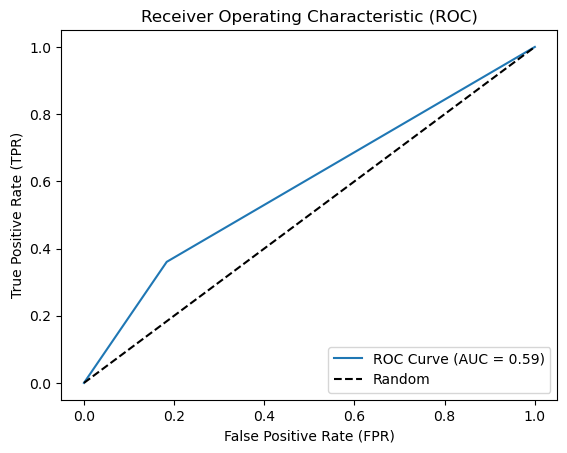

In [8]:
labels_train, labels_train_pred, labels_test, labels_pred = k_nearest_neighbors.k_nearest(filename)
# k_nearest_neighbors.grid_search(filename)
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)

In [9]:
labels_train, labels_train_pred, labels_test, labels_pred = support_vector.support_vector(filename)
support_vector.grid_search(filename)
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)

SVM: 
Fitting 5 folds for each of 336 candidates, totalling 1680 fits


In [ ]:
labels_train, labels_train_pred, labels_test, labels_pred = gradient_boost.gradient_boost(filename)
gradient_boost.grid_search(filename)
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)

In [ ]:
labels_train, labels_train_pred, labels_test, labels_pred = random_forest.random_forest(filename)
random_forest.grid_search(filename)
analysis(labels_train, labels_train_pred)
analysis(labels_test, labels_pred)
auc(labels_test, labels_pred)